In [68]:
import pandas as pd
import seaborn as sns
from bokeh.charts import Line
from bokeh.layouts import gridplot, row
from bokeh.plotting import figure, output_notebook, show
%matplotlib inline

In [69]:
pd_dados = pd.read_csv('turma_professor_notas.csv')
pd_disciplinas = pd.read_csv('disciplinas.csv')

## 1) Notas das turmas tem muita diferença entre um mesmo semestre?

In [70]:
listTabs = []
for index, row in pd_disciplinas.iterrows():
    
    y = pd_dados[pd_dados['nome_disc'] == row['nome_disc']]['reprovados']
    x = []
    for index_disc, row_disc in pd_dados[pd_dados['nome_disc'] == row['nome_disc']].iterrows():
        if (int(row_disc['periodo']) == 1):
            x.append(str(row_disc['ano'])+""+str(0))
        else:
           x.append(str(row_disc['ano'])+""+str(5))
        
    p = figure(plot_width=400, plot_height=300, title=row['nome_disc'], x_axis_label='ano/semestre', y_axis_label='Quant Reprovados')
    p.circle(x, y, fill_color="white", size=12)
    listTabs.append(p)

output_notebook()
grid = gridplot([[ listTabs[0], listTabs[1]],[ listTabs[2], listTabs[3]]])
show(grid)

Loading BokehJS ...

## 2) Pq FMC2 tem menos reprovações pq está entrando menos alunos ?

In [71]:
listTabs = []
for index, row in pd_disciplinas.iterrows():
    x = ['20140', '20145', '20150', '20155', '20160', '20165', '20170']

    listCount = []
    for count in pd_dados.groupby(['nome_disc', 'ano_periodo'])['total_alunos'].sum()[row['nome_disc']]:
        listCount.append(count)

    p = figure(plot_width=400, plot_height=300, title=row['nome_disc'], x_axis_label='ano/semestre', y_axis_label='Total Matriculados')
    p.line(x, listCount)
    listTabs.append(p)

output_notebook()
grid = gridplot([[ listTabs[0], listTabs[1]],[ listTabs[2], listTabs[3]]])
show(grid)

Loading BokehJS ...

## 3) Vamos deixar tudo numa mesma escala

In [72]:
listTabsY = []
for index, row in pd_disciplinas.iterrows():
    listCount = []
    for count in pd_dados.groupby(['nome_disc', 'ano_periodo'])['total_alunos'].sum()[row['nome_disc']]:
        listCount.append(count)
    listTabsY.append(listCount)


data = dict(RPMTI = listTabsY[0], C1 = listTabsY[1], FMC1 = listTabsY[2], FMC2 = listTabsY[3], Semestre=x)
df = pd.DataFrame(data)

line = Line(df, y=['RPMTI', 'C1', 'FMC1', 'FMC2'], x='Semestre', dash=['RPMTI', 'C1', 'FMC1', 'FMC2'],
            title="Matriculados por semestre", ylabel='Total de matriculados', xlabel="Ano/Semestre", 
            legend=True, plot_width=800)
output_notebook()
show(line)

Loading BokehJS ...

## 4) Qual a porcentagem de reprovação da galera ?

In [73]:
listAlunos = []
listRep = []
for index, row in pd_disciplinas.iterrows():
    listTotalAlunos = []
    listTotalReprovados = []
    
    for totalAlunos in pd_dados.groupby(['nome_disc', 'ano_periodo'])['total_alunos'].sum()[row['nome_disc']]:
        listTotalAlunos.append(totalAlunos)
        
    for totalRep in pd_dados.groupby(['nome_disc', 'ano_periodo'])['reprovados'].sum()[row['nome_disc']]:
        listTotalReprovados.append(totalRep)
        
    listAlunos.append(listTotalAlunos)
    listRep.append(listTotalReprovados)

listTabsY = []
for apro, rep in zip(listAlunos, listRep):
    listTabsYAux = []
    for i in range(len(apro)):
        listTabsYAux.append((rep[i]/apro[i])*100)
    listTabsY.append(listTabsYAux)
    
data = dict(RPMTI = listTabsY[0], C1 = listTabsY[1], FMC1 = listTabsY[2], FMC2 = listTabsY[3], Semestre=x)
df = pd.DataFrame(data)

line = Line(df, y=['RPMTI', 'C1', 'FMC1', 'FMC2'], x='Semestre', dash=['RPMTI', 'C1', 'FMC1', 'FMC2'],
            title="% de reprovados por disciplina", ylabel='Taxa de reprovados', xlabel="Ano/Semestre", 
            legend=True, plot_width=800)
output_notebook()
show(line)

Loading BokehJS ...

## 5) Quais professores estão gerando mais reprovações?

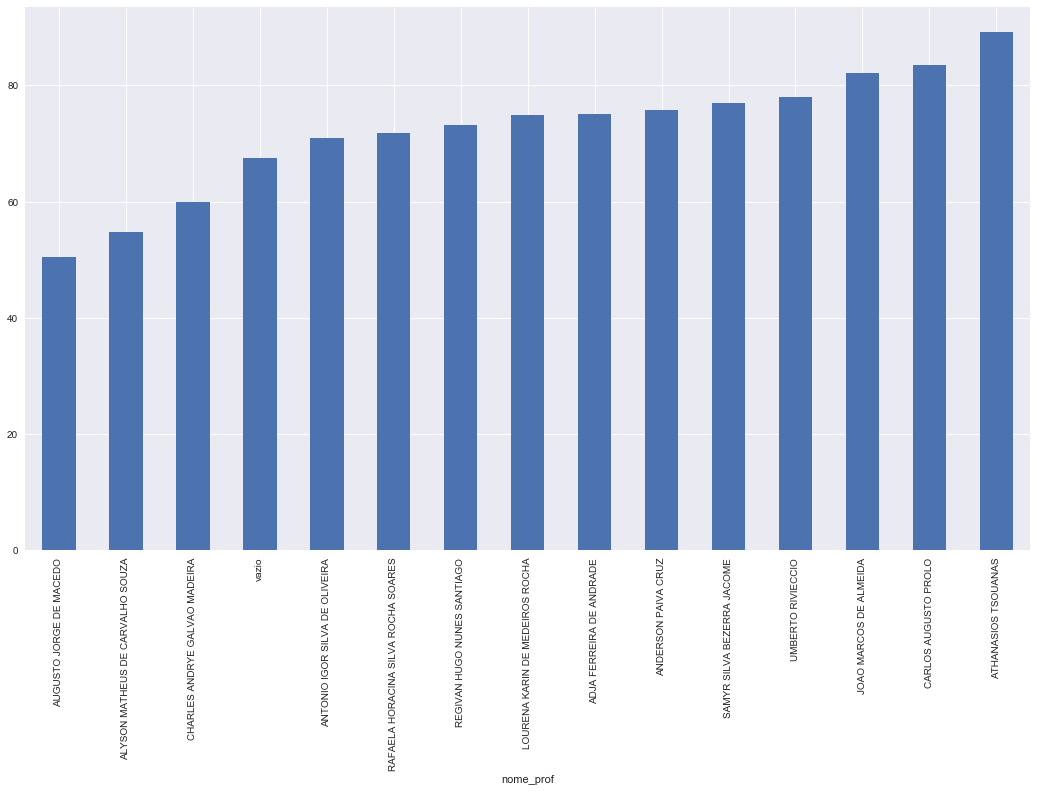

In [74]:
((pd_dados.groupby(['nome_prof'])['reprovados'].sum()/pd_dados.groupby(['nome_prof'])['total_alunos'].sum())*100).sort_values().plot(kind='bar', figsize=(18, 10))

In [75]:
((pd_dados.groupby(['nome_prof'])['reprovados'].sum()/pd_dados.groupby(['nome_prof'])['total_alunos'].sum())*100).sort_values()

nome_prof
AUGUSTO JORGE DE MACEDO                50.526316
ALYSON MATHEUS DE CARVALHO SOUZA       54.802260
CHARLES ANDRYE GALVAO MADEIRA          59.927798
vazio                                  67.566607
ANTONIO IGOR SILVA DE OLIVEIRA         70.976253
RAFAELA HORACINA SILVA ROCHA SOARES    71.834061
REGIVAN HUGO NUNES SANTIAGO            73.142857
LOURENA KARIN DE MEDEIROS ROCHA        74.866310
ADJA FERREIRA DE ANDRADE               75.000000
ANDERSON PAIVA CRUZ                    75.681342
SAMYR SILVA BEZERRA JACOME             76.923077
UMBERTO RIVIECCIO                      78.021978
JOAO MARCOS DE ALMEIDA                 82.051282
CARLOS AUGUSTO PROLO                   83.445190
ATHANASIOS TSOUANAS                    89.096573
dtype: float64